In [1]:
!pip install pandas


# 1.Data Cleaning and Preparation

In [3]:
#1. Importing the required libraries for EDA

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline     
sns.set(color_codes=True)

In [5]:
#2. Loading the data into the data frame

In [6]:
df=pd.read_csv('/Users/shreyasingh/Downloads/EDA1/Cardiotocographic.csv')

In [7]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [8]:
# 3. Checking the types of data

In [9]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [10]:
 # 4. dropping duplicate rows

In [11]:
df.shape

(2126, 14)

In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (2, 14)


In [13]:
df = df.drop_duplicates()
df.head(5)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [14]:
# 5. Dropping the missing or null values.

In [15]:
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [16]:
df = df.dropna()    # Dropping the missing values.
df.count()

LB          2103
AC          2103
FM          2103
UC          2103
DL          2103
DS          2103
DP          2103
ASTV        2103
MSTV        2103
ALTV        2103
MLTV        2103
Width       2103
Tendency    2103
NSP         2103
dtype: int64

In [17]:
print(df.isnull().sum())   # After dropping the values

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [18]:
#6. Detecting Outliers and treating outliers using IQR (Interquartile Range) method

In [19]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()  


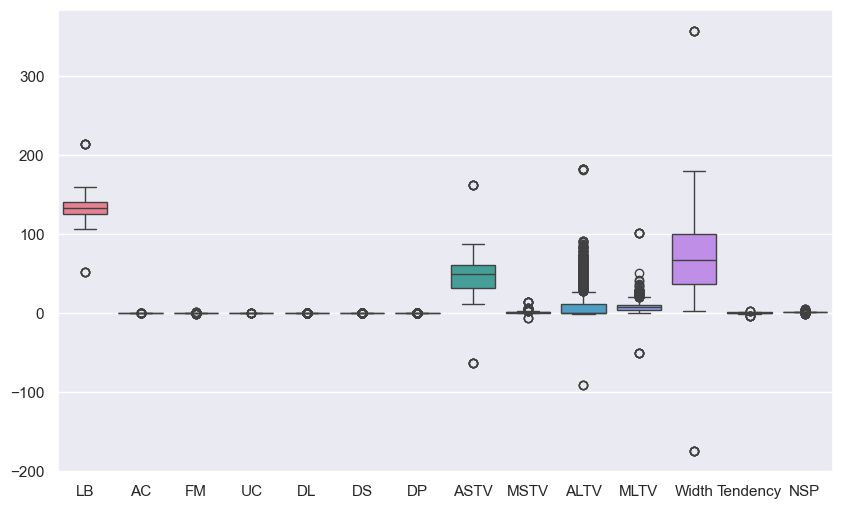

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.show()

In [21]:
def outlier_Detection(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return df        


In [22]:
numerical_cols = df.select_dtypes(include=['float64']).columns

# Treat outliers
df_cleaned = outlier_Detection(df, numerical_cols)


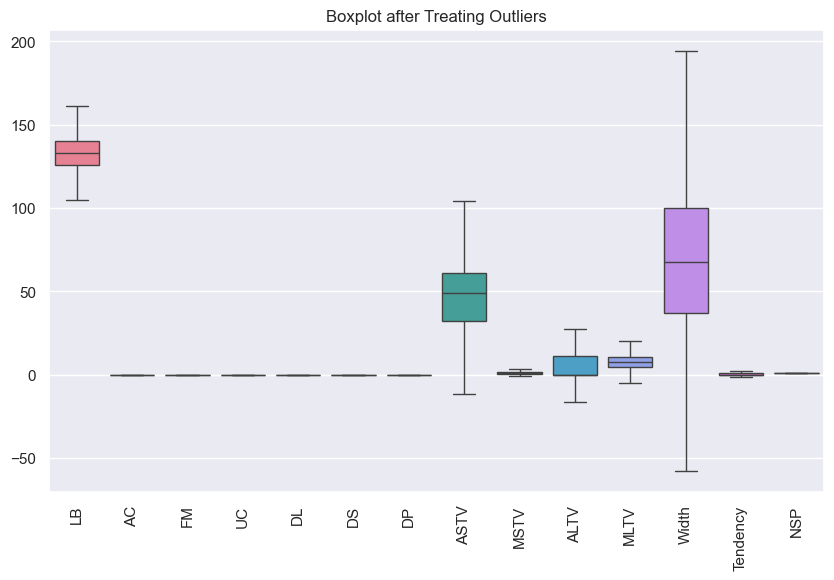

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot after Treating Outliers")
plt.show()

In [24]:
# Display cleaned dataset
df_cleaned.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,2.40,64.0,0.999926,1.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.40,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.40,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.35,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.90,117.0,1.000000,1.0


# 2. Statistical Summary

In [26]:
summary_df = pd.DataFrame()

In [27]:
# Central tendency: Mean and Median
summary_df['Mean'] = df.mean()
summary_df['Median'] = df.median()

# Dispersion: Standard Deviation and IQR (Interquartile Range)
summary_df['Standard Deviation'] = df.std()
summary_df['Interquartile Range (IQR)'] = df.quantile(0.75) - df.quantile(0.25)

# Display the summary statistics
print("Statistical Summary:")
print(summary_df)



Statistical Summary:
                Mean      Median  Standard Deviation  \
LB        133.291604  133.000000            9.976211   
AC          0.003144    0.001631            0.003844   
FM          0.001565    0.000000            0.002477   
UC          0.004361    0.004484            0.003008   
DL          0.001770    0.000000            0.002675   
DS          0.000000    0.000000            0.000000   
DP          0.000000    0.000000            0.000000   
ASTV       46.999304   49.000000           17.633594   
MSTV        1.301912    1.200000            0.779896   
ALTV        6.733464    0.000000           10.400402   
MLTV        8.017610    7.400000            5.094192   
Width      70.351685   67.486468           39.773195   
Tendency    0.319999    0.000000            0.624916   
NSP         1.000000    1.000000            0.000000   

          Interquartile Range (IQR)  
LB                        14.000000  
AC                         0.005650  
FM                      

In [28]:
 # Highlight interesting findings
print("\nInteresting Findings:")
for col in df.columns:
    mean = summary_df.loc[col, 'Mean']
    median = summary_df.loc[col, 'Median']
    std_dev = summary_df.loc[col, 'Standard Deviation']
    iqr = summary_df.loc[col, 'Interquartile Range (IQR)']
    
    if abs(mean - median) > (0.1 * mean):  # Highlight skewed distributions
        print(f"- {col} has a large difference between mean ({mean}) and median ({median}), indicating skewness.")
    
    if std_dev > (0.5 * mean):  # Highlight high variability
        print(f"- {col} has a high standard deviation ({std_dev}) relative to its mean ({mean}), indicating high variability.")
    
    if iqr > (0.5 * mean):  # Highlight wide IQR relative to the mean
        print(f"- {col} has a wide interquartile range ({iqr}) relative to its mean ({mean}), suggesting significant spread.")

# Display the summary
summary_df.head()


Interesting Findings:
- AC has a large difference between mean (0.0031437421528496905) and median (0.001631321), indicating skewness.
- AC has a high standard deviation (0.0038440819778356506) relative to its mean (0.0031437421528496905), indicating high variability.
- AC has a wide interquartile range (0.005649718) relative to its mean (0.0031437421528496905), suggesting significant spread.
- FM has a large difference between mean (0.0015645395955572498) and median (0.0), indicating skewness.
- FM has a high standard deviation (0.00247727632266555) relative to its mean (0.0015645395955572498), indicating high variability.
- FM has a wide interquartile range (0.0025591905) relative to its mean (0.0015645395955572498), suggesting significant spread.
- UC has a high standard deviation (0.003008151408473436) relative to its mean (0.004361459344044524), indicating high variability.
- UC has a wide interquartile range (0.00470497) relative to its mean (0.004361459344044524), suggesting sig

,Mean,Median,Standard Deviation,Interquartile Range (IQR)
LB,133.291604,133.000000,9.976211,14.000000
AC,0.003144,0.001631,0.003844,0.005650
FM,0.001565,0.000000,0.002477,0.002559
UC,0.004361,0.004484,0.003008,0.004705
DL,0.001770,0.000000,0.002675,0.003295


# 3. Data Visualization

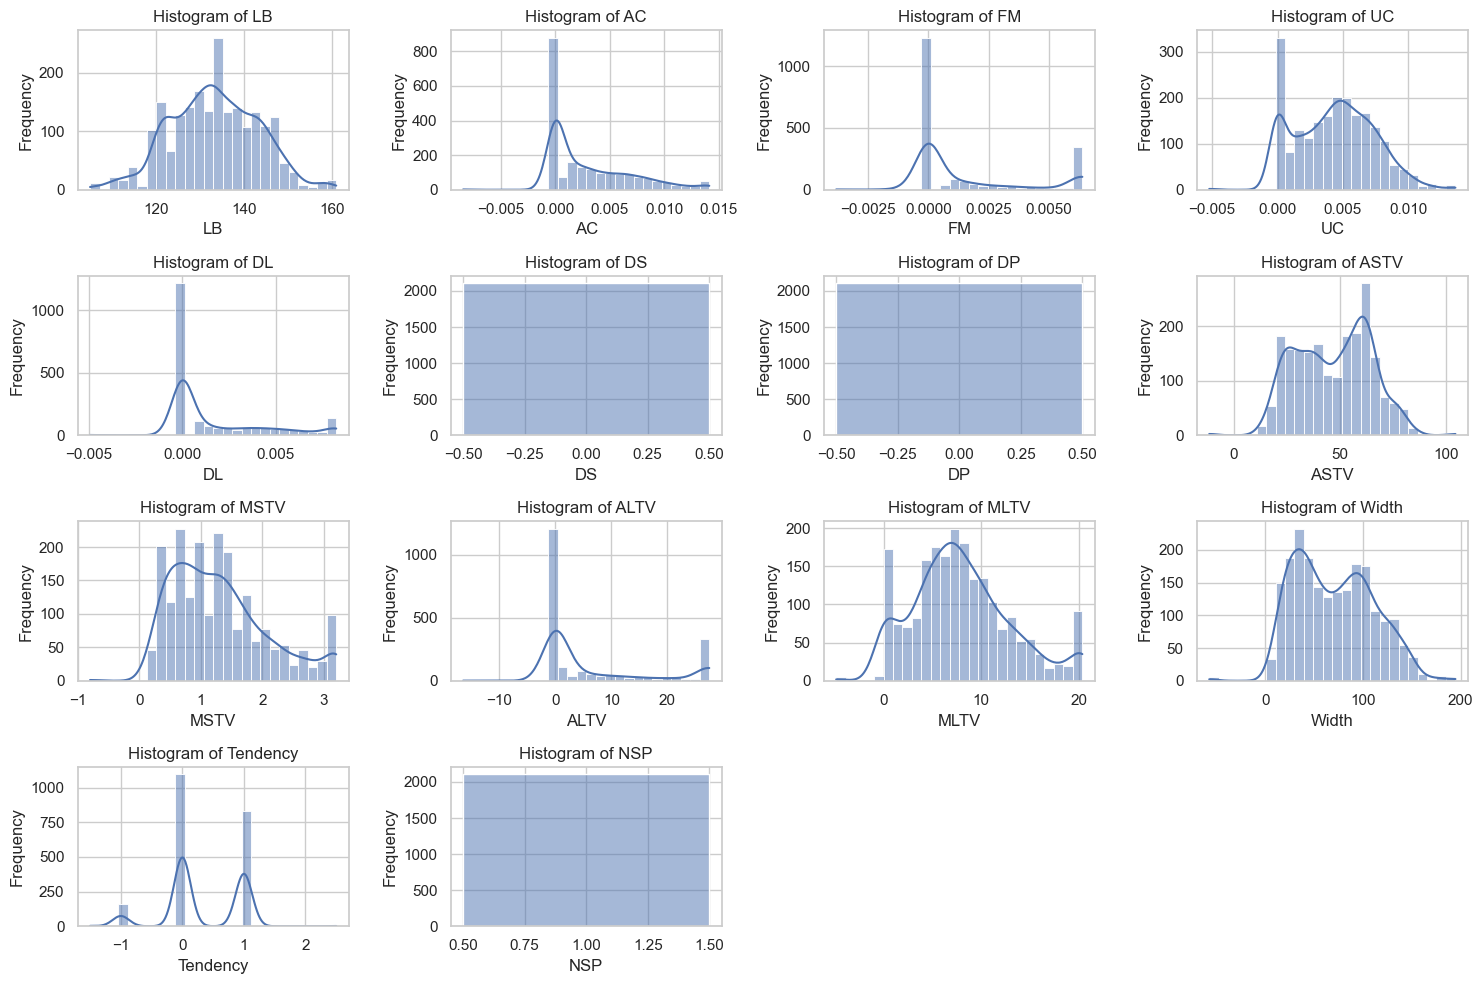

In [30]:
sns.set(style='whitegrid')

# 1. Histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows/columns as needed
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


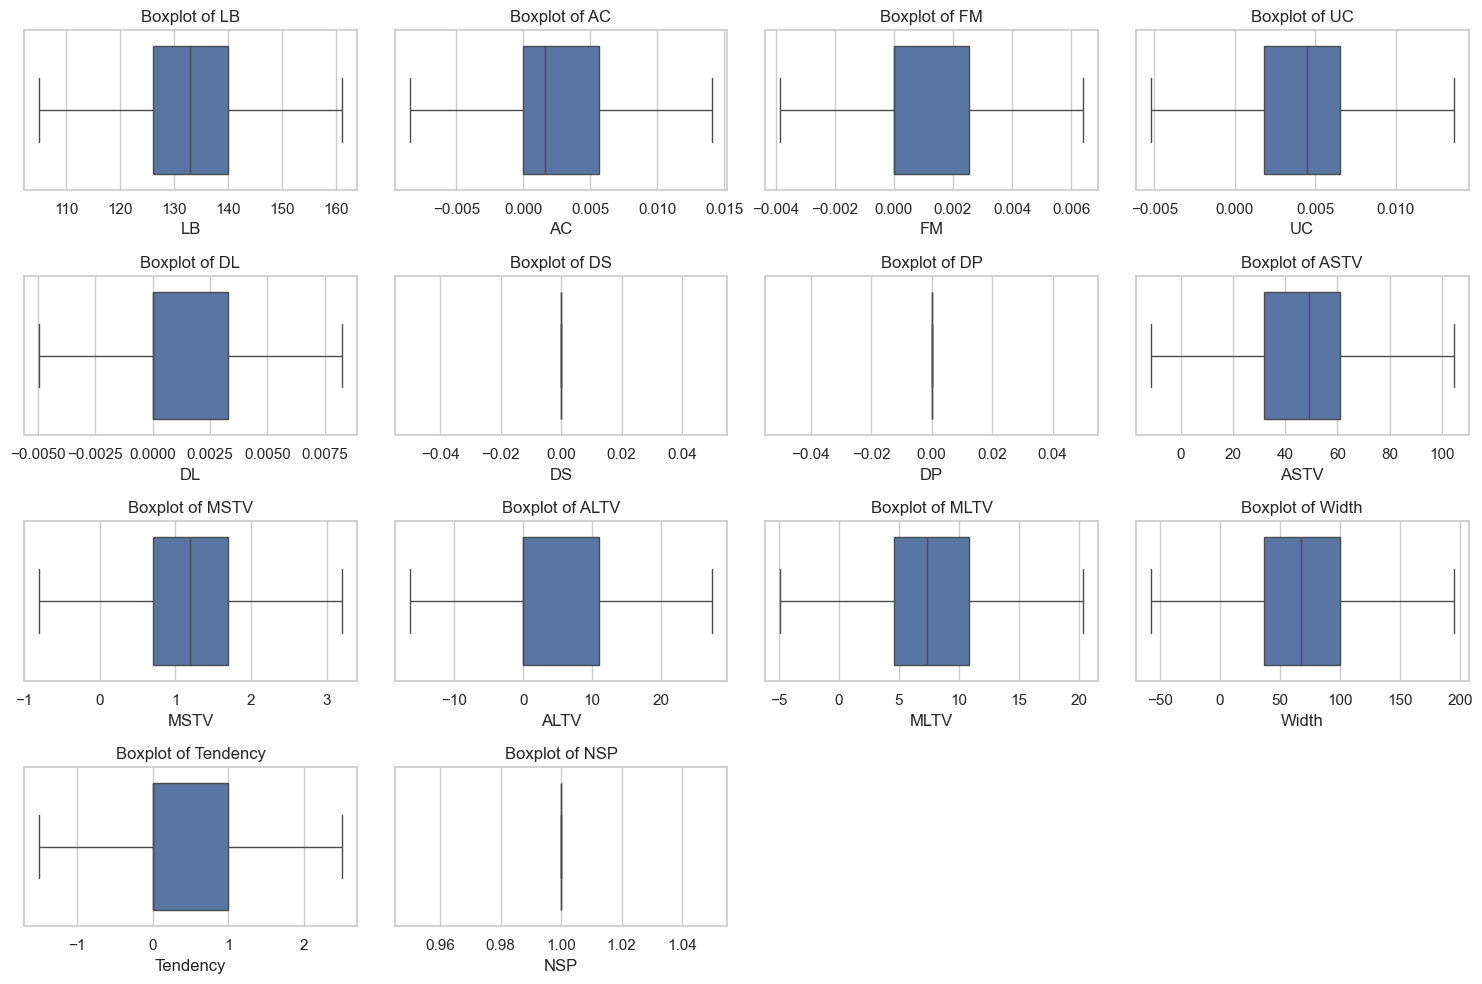

In [31]:
# 2. Boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
plt.tight_layout()
plt.show()


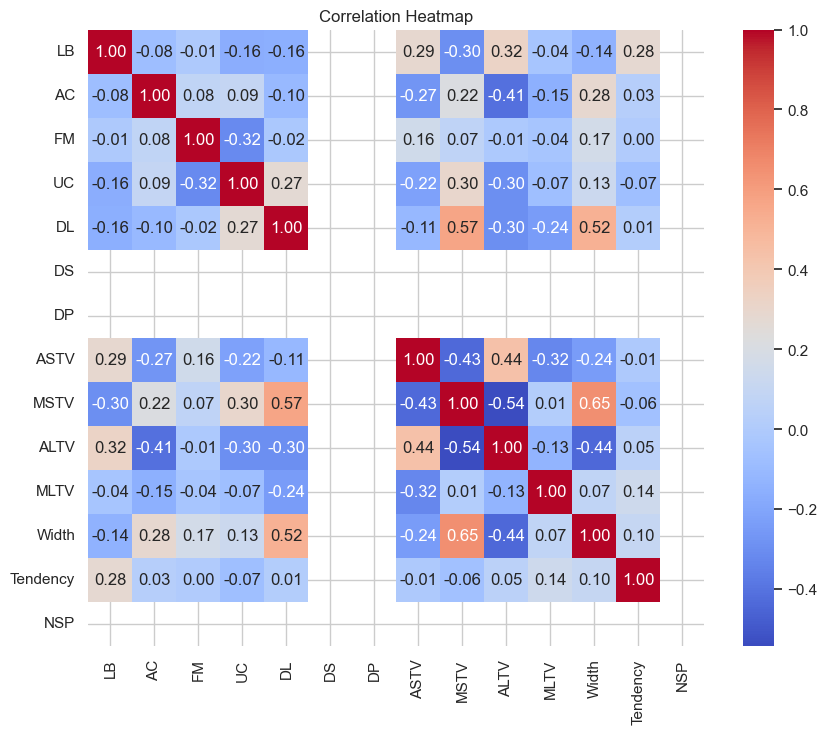

In [32]:
# 3. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

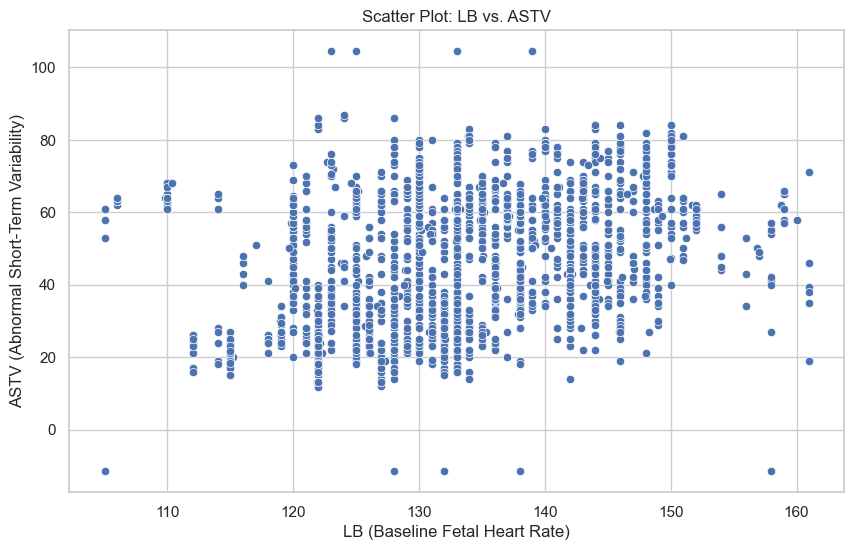

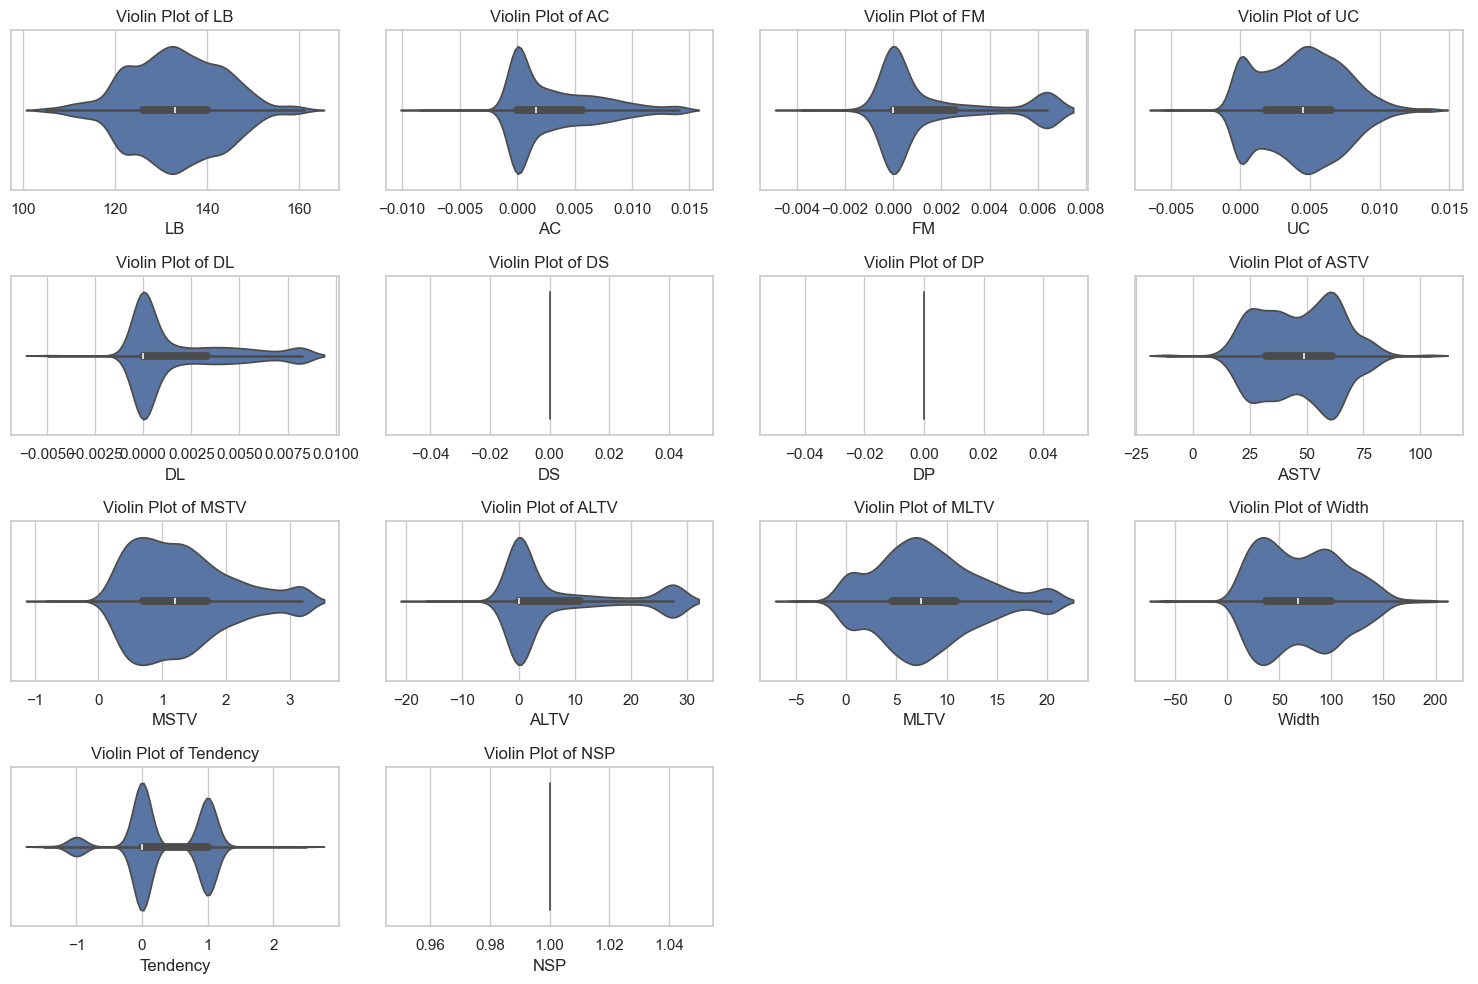

In [33]:
# 4. Scatter plots for pairs of variables (e.g., LB vs. ASTV)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='ASTV', data=df)
plt.title('Scatter Plot: LB vs. ASTV')
plt.xlabel('LB (Baseline Fetal Heart Rate)')
plt.ylabel('ASTV (Abnormal Short-Term Variability)')
plt.show()

 
# 6. Violin plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.violinplot(x=df[col])
    plt.title(f'Violin Plot of {col}')
    
plt.tight_layout()
plt.show()

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_65167/2385601449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NSP', palette='viridis')


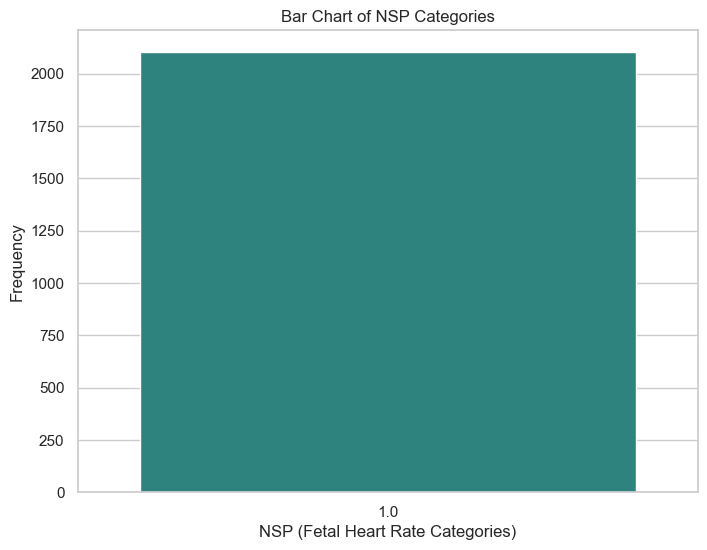

In [34]:
# 7. Bar chart for categorical variables (e.g., NSP)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NSP', palette='viridis')
plt.title('Bar Chart of NSP Categories')
plt.xlabel('NSP (Fetal Heart Rate Categories)')
plt.ylabel('Frequency')
plt.show()

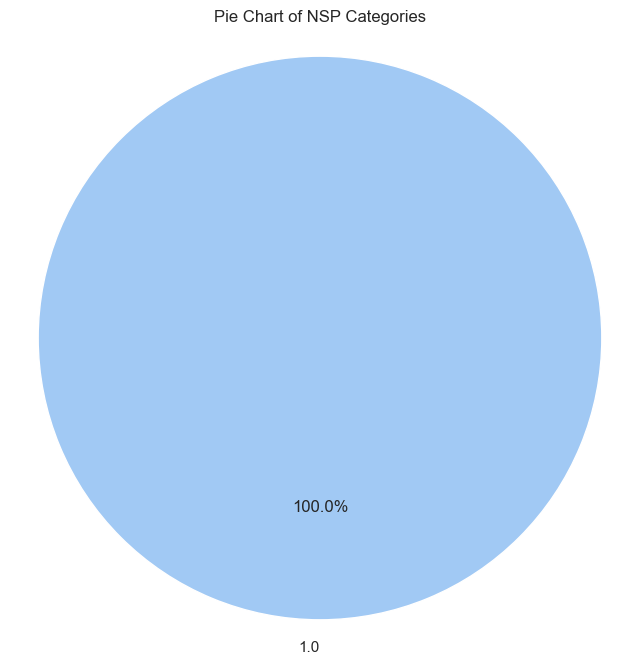

In [35]:
# 8. Pie chart for categorical variables (e.g., NSP)
nsp_counts = df['NSP'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(nsp_counts, labels=nsp_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of NSP Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 4. Pattern Recognition and Insights

In [37]:
# Identify significant correlations
correlation_matrix = df.corr()
threshold = 0.5


In [38]:
# Setting a threshold for strong correlations
threshold = 0.5

In [39]:
# Extracting strong correlations
strong_correlations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]
print("Strong Correlations (Threshold = ±0.5):")
print(strong_correlations)

Strong Correlations (Threshold = ±0.5):
           LB   AC   FM   UC        DL  DS  DP  ASTV      MSTV      ALTV  \
LB        1.0  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
AC        NaN  1.0  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
FM        NaN  NaN  1.0  NaN       NaN NaN NaN   NaN       NaN       NaN   
UC        NaN  NaN  NaN  1.0       NaN NaN NaN   NaN       NaN       NaN   
DL        NaN  NaN  NaN  NaN  1.000000 NaN NaN   NaN  0.566593       NaN   
DS        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
DP        NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
ASTV      NaN  NaN  NaN  NaN       NaN NaN NaN   1.0       NaN       NaN   
MSTV      NaN  NaN  NaN  NaN  0.566593 NaN NaN   NaN  1.000000 -0.541561   
ALTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN -0.541561  1.000000   
MLTV      NaN  NaN  NaN  NaN       NaN NaN NaN   NaN       NaN       NaN   
Width     NaN  NaN  NaN  NaN  0.516180 NaN NaN  

In [40]:
# Potential implications of strong correlations
print("\nPotential Implications:")
for col in strong_correlations.columns:
    correlated_vars = strong_correlations.index[strong_correlations[col].notnull()].tolist()
    for var in correlated_vars:
        if col != var:
            correlation_value = strong_correlations.loc[var, col]
            print(f"- {col} and {var} have a correlation of {correlation_value:.2f}. This suggests a potential relationship that could be explored further for implications in clinical practices or predictions.")


Potential Implications:
- DL and MSTV have a correlation of 0.57. This suggests a potential relationship that could be explored further for implications in clinical practices or predictions.
- DL and Width have a correlation of 0.52. This suggests a potential relationship that could be explored further for implications in clinical practices or predictions.
- MSTV and DL have a correlation of 0.57. This suggests a potential relationship that could be explored further for implications in clinical practices or predictions.
- MSTV and ALTV have a correlation of -0.54. This suggests a potential relationship that could be explored further for implications in clinical practices or predictions.
- MSTV and Width have a correlation of 0.65. This suggests a potential relationship that could be explored further for implications in clinical practices or predictions.
- ALTV and MSTV have a correlation of -0.54. This suggests a potential relationship that could be explored further for implications i

# 5. conclusion

In [42]:
# scaling methods
# Apply Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print(scaled_df)

            LB        AC        FM        UC        DL   DS   DP      ASTV  \
0     0.267857  0.375000  0.375000  0.277331  0.375000  0.0  0.0  0.728448   
1     0.482143  0.657297  0.375000  0.616312  0.617025  0.0  0.0  0.245690   
2     0.500000  0.522010  0.375000  0.718654  0.627076  0.0  0.0  0.237069   
3     0.517857  0.488316  0.375000  0.688698  0.569302  0.0  0.0  0.237069   
4     0.481218  0.663274  0.375000  0.710029  0.375000  0.0  0.0  0.237069   
...        ...       ...       ...       ...       ...  ...  ...       ...   
2098  0.625000  0.375000  1.000000  0.671900  0.375000  0.0  0.0  0.780172   
2099  0.625000  0.409276  0.375000  0.648176  0.375000  0.0  0.0  0.771552   
2100  0.625000  0.418382  0.375000  0.641985  0.375000  0.0  0.0  0.780172   
2101  0.625000  0.405041  0.375000  0.601987  0.375000  0.0  0.0  0.771552   
2102  0.660714  0.446486  0.356677  0.706534  0.375000  0.0  0.0  0.737069   

       MSTV      ALTV      MLTV     Width  Tendency  NSP  
0   

In [43]:
from sklearn.preprocessing import StandardScaler

# Apply Standard Scaling
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized_data, columns=df.columns)
print(standardized_df)

            LB        AC        FM        UC        DL   DS   DP      ASTV  \
0    -1.332647 -0.818008 -0.631707 -1.450225 -0.661947  0.0  0.0  1.474849   
1    -0.129499  0.841973 -0.631707  0.671045  0.530982  0.0  0.0 -1.701663   
2    -0.029237  0.046450 -0.631707  1.311479  0.580522  0.0  0.0 -1.758387   
3     0.071025 -0.151678 -0.631707  1.124021  0.295756  0.0  0.0 -1.758387   
4    -0.134690  0.877119 -0.631707  1.257504 -0.661947  0.0  0.0 -1.758387   
...        ...       ...       ...       ...       ...  ...  ...       ...   
2098  0.672599 -0.818008  1.951573  1.018902 -0.661947  0.0  0.0  1.815189   
2099  0.672599 -0.616457 -0.631707  0.870437 -0.661947  0.0  0.0  1.758466   
2100  0.672599 -0.562908 -0.631707  0.831700 -0.661947  0.0  0.0  1.815189   
2101  0.672599 -0.641360 -0.631707  0.581399 -0.661947  0.0  0.0  1.758466   
2102  0.873124 -0.397649 -0.707442  1.235632 -0.661947  0.0  0.0  1.531572   

          MSTV      ALTV      MLTV     Width  Tendency  NSP  
0

In [44]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(df)
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(df.columns))
print(poly_df)

              LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2098  140.000000  0.000000  0.006398  0.007426  0.000000  0.0  0.0  79.0   
2099  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2100  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2101  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2102  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV  ALTV  ...    MLTV^2  MLTV Width  MLTV Tendency  MLTV NSP  Width^2  \
0     

In [45]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

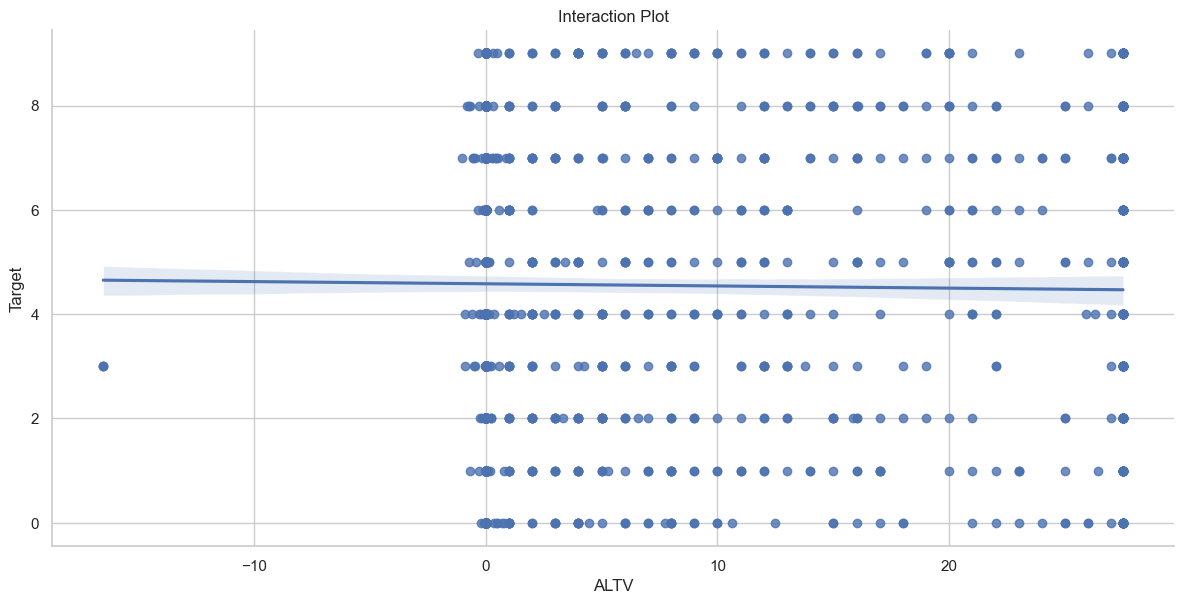

In [88]:
df['Target'] = np.random.randint(0, 10, size=len(df))

# Interaction plot
sns.lmplot(data=df, x='ALTV', y='Target', aspect=2, height=6)
plt.title("Interaction Plot")
plt.show()